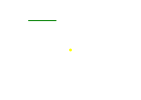

In [1]:
using Compose
composition = compose(context(),(context(),(rectangle(.2,.2,.2,.01)), fill("green")),(context() ,fill("yellow"),circle(.5,.5,.01)))

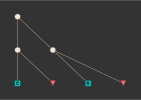

In [85]:
introspect(composition)

In [111]:
function _arrayscatter(x,y,shape,debug=false, custom=nothing)
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(-1,-1), (-1,1), (1,1)],:blue)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(0,0), (0,1), (0,1)],:blue)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    fullcustom = ""
    if custom != nothing
        [fullcustom = string(fullcustom, i) for i in custom]
    end
    expression = string("compose(context(), (context(),", axisx_tag, axisy_tag,"), (context(),")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = i / topx
        inputy = w / topy
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp))
    end
    expression = Meta.parse(string(expression,"))"))
    if debug == true println(expression) end
    composition = eval(expression)
    show() = composition
    tree() = introspect(composition)
    (var)->(show;composition;tree)
end

_arrayscatter (generic function with 2 methods)

In [112]:
x = [5,10,15,20]
y = [25,30,35,40]

4-element Array{Int64,1}:
 25
 30
 35
 40

In [4]:
function Circle(x,y,diameter,fillin=:orange,stroke=:black)
    composition = compose(context(), circle(x,y,diameter), fill(string(fillin)))
    color = string("\"",string(fillin),"\"")
    stroke = string("\"",string(stroke),"\"")
    tag = string("circle(",string(x),",",string(y),',',diameter,"), fill(", color , "),")
    tree() = introspect(composition)
    show() = composition
    x = x
    y = y
    update(x,y) =  string("circle(",string(x),",",string(y),',',diameter,"), fill(", color ,"), stroke(",stroke, "),")
    (var)->(show;composition;tree;tag;x;y;update;diameter)
end
function Line(pairs, color=:black, width=2)
    tree() = introspect(composition)
    show() = composition
    composition = compose(context(), line(pairs), stroke(string(color)))
    color = string("\"",string(color),"\"")
    pairstring = ""
    for i in pairs
        s = string(i) * ","
        pairstring = pairstring * s
    end
    update(pairs) = string("line([",string(join(pairstring)),"]), stroke(", color, "), linewidth(",width,"mm),")
    (var)->(show;composition;tree;update;color;pairs)
end

Line (generic function with 3 methods)

In [106]:
shape = Circle(.5,.5,.01,:orange)

#29 (generic function with 1 method)

In [125]:
plot = _arrayscatter(x,y,shape,true)

(context(), line([(0, 0.25),(1, 0.25),]), stroke("lightblue"), linewidth(0.3),line([(0, 0.5),(1, 0.5),]), stroke("lightblue"), linewidth(0.3),line([(0, 0.75),(1, 0.75),]), stroke("lightblue"), linewidth(0.3),line([(0, 1.0),(1, 1.0),]), stroke("lightblue"), linewidth(0.3),),,(context(), line([(0.25, 0),(0.25, 1),]), stroke("lightblue"), linewidth(0.3),line([(0.5, 0),(0.5, 1),]), stroke("lightblue"), linewidth(0.3),line([(0.75, 0),(0.75, 1),]), stroke("lightblue"), linewidth(0.3),line([(1.0, 0),(1.0, 1),]), stroke("lightblue"), linewidth(0.3),)


Base.Meta.ParseError: Base.Meta.ParseError("unexpected \",\"")

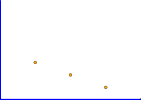

In [121]:
plot.show()

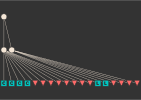

In [8]:
plot.tree()

In [66]:
function _dfscatter(x,y,shape,debug=false)
    topy = maximum(x[y])
    axisx = Line([(-1,-1), (-1,1), (1,1)],:lightblue)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(0,0), (0,1), (0,1)],:lightblue)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    expression = string("compose(context()", ", (context(), ", axisx_tag, axisy_tag,"),")
    # Coordinate parsing -------
    y = x[y]
    counter = 0
    for col in eachcol(x, false)
        counter = counter + 1
        topx = maximum(col)
       if col !=  y
            for (i, w) in zip(col, y)
                current_shape = shape[counter]
                inputx = i / topx
                inputy = w / topy
                exp = current_shape.update(inputx,inputy)
                expression = string(expression,"(context(), ", string(exp),"),")
            end
        end
    end
    expression = Meta.parse(string(expression,")"))
    if debug == true println(expression) end
    composition = eval(expression)
    show() = composition
    tree() = introspect(composition)
    (var)->(show;composition;tree)
end

_dfscatter (generic function with 2 methods)

In [67]:
using DataFrames
df = DataFrame(:B => [5,10,15,20],:C => [10,11,18,12], :Y => [22,28,55,44])

4×3 DataFrame
│ Row │ B     │ C     │ Y     │
│     │ Int64 │ Int64 │ Int64 │
├─────┼───────┼───────┼───────┤
│ 1   │ 5     │ 10    │ 22    │
│ 2   │ 10    │ 11    │ 28    │
│ 3   │ 15    │ 18    │ 55    │
│ 4   │ 20    │ 12    │ 44    │

In [68]:
Bshape = Circle(.5,.5,.01,:orange)
Cshape = Circle(.5,.5,.01,:blue,:yellow)

#29 (generic function with 1 method)

In [69]:
shapes = [Bshape,Cshape];

In [70]:
plot = _dfscatter(df,:Y,shapes)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = _dfscatter(::DataFrame, ::Symbol, ::Array{getfield(Main, Symbol("##29#33")){Float64,Context,String,getfield(Main, Symbol("#tree#30")){Context},getfield(Main, Symbol("#show#31")){Context},getfield(Main, Symbol("#update#32")){Float64,String}},1}, ::Bool) at In[66]:2
└ @ Main ./In[66]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = _dfscatter(::DataFrame, ::Symbol, ::Array{getfield(Main, Symbol("##29#33")){Float64,Context,String,getfield(Main, Symbol("#tree#30")){Context},getfield(Main, Symbol("#show#31")){Context},getfield(Main, Symbol("#update#32")){Float64,String}},1}, ::Bool) at In[66]:9
└ @ Main ./In[66]:9


#66 (generic function with 1 method)

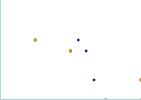

In [71]:
plot.show()

In [72]:
for col in eachcol(df, false)
   print(col) 
end

[5, 10, 15, 20][10, 11, 18, 12][22, 28, 55, 44]

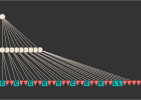

In [73]:
plot.tree()

In [74]:
Scatter(x::DataFrame,y::Symbol,shape::Array,debug) = _dfscatter(x,y,shape,debug)
Scatter(x::Array,y::Array,shape,debug) = _arrayscatter(x,y,shape,debug)

Scatter (generic function with 2 methods)

In [75]:
function Grid(preset=nothing,x=nothing,y=nothing)

end

Grid (generic function with 5 methods)

In [76]:
:4

4

In [124]:
function Grid(divisions,colorx=:lightblue,colory=:lightblue,thickness=.3)
    division_amount = 1 / divisions
    total = 0
    Xexpression = "(context(), "
    while total < 1
        total = total + division_amount
        linedraw = Line([(0,total),(1,total)],:lightblue,thickness)
        exp = linedraw.update(:This_symbol_means_nothing)
        Xexpression = string(Xexpression,string(exp))
    end
    Xexpression = string(Xexpression, "),")
    total = 0
    Yexpression = ",(context(), "
    while total < 1
        total = total + division_amount
        linedraw = Line([(total,0),(total,1)],:lightblue,thickness)
        exp = linedraw.update(:hi)
        Yexpression = string(Yexpression,string(exp))
    end
    composexp = string(string(Xexpression), string(Yexpression),")")
    println(composexp)
    update() = string(composexp)
    (var)->(update;composexp)
end

Grid (generic function with 5 methods)

In [98]:
grid = Grid(4)

#93 (generic function with 1 method)

In [79]:
grid.show()

ErrorException: type ##58#59 has no field show

In [80]:
testline.show()

UndefVarError: UndefVarError: testline not defined

In [81]:
function Rectangle(x,y,width,height,fillin=:blue)
    composition = compose(context(), rectangle(x,y,width,height), fill(["yellow,blue"]))
    color = string("\"",string(fillin),"\"")
    tag = string("rectangle(",string(x),",",string(y),',',width,',',height, "), fill(", color , "),")
    tree() = introspect(composition)
    show() = composition
    x = x
    y = y
    update(x,y) =  string("rectangle(",string(x),",",string(y),',',width,',',height, "), fill(", color , "),")
    (var)->(show;composition;tree;tag;x;y;update;diameter)
end

Rectangle (generic function with 2 methods)

In [82]:
df = DataFrame(:A => randn(200), :B => randn(200), :M => randn(200), :Y => randn(200))

200×4 DataFrame
│ Row │ A         │ B          │ M          │ Y          │
│     │ Float64   │ Float64    │ Float64    │ Float64    │
├─────┼───────────┼────────────┼────────────┼────────────┤
│ 1   │ -1.408    │ 0.0920984  │ 0.878008   │ -1.49921   │
│ 2   │ -0.281771 │ 1.18886    │ 2.54455    │ 0.806508   │
│ 3   │ -1.01621  │ -0.077173  │ 0.976108   │ -2.32251   │
│ 4   │ -1.36677  │ 0.190649   │ 2.02123    │ -0.190831  │
│ 5   │ 1.37302   │ 1.61104    │ -0.317576  │ -0.0793399 │
│ 6   │ -0.227729 │ 0.714108   │ -1.23028   │ 0.865792   │
│ 7   │ 0.921619  │ -0.144883  │ 0.687847   │ 0.41187    │
│ 8   │ -1.64765  │ 0.0959675  │ -0.75239   │ -1.54086   │
│ 9   │ 0.234445  │ -0.307027  │ 0.0321998  │ -1.73531   │
│ 10  │ -0.542848 │ -0.663033  │ 1.02463    │ -0.566911  │
⋮
│ 190 │ 1.412     │ 0.589954   │ 1.42749    │ 0.258578   │
│ 191 │ 0.484674  │ 0.504553   │ -1.66179   │ -3.22785   │
│ 192 │ -0.96356  │ -0.0379282 │ -0.224765  │ -1.56089   │
│ 193 │ 0.326735  │ -2.2902    │ 1.85348    │ -0.701164  │
│ 194 │ 0.0740526 │ 0.742485   │ 0.895822   │ -1.23735   │
│ 195 │ 0.40239   │ 0.508522   │ 1.05645    │ -0.395584  │
│ 196 │ -0.854637 │ 0.0878977  │ -0.0319071 │ 0.207414   │
│ 197 │ 0.705864  │ -0.665194  │ -3.3872    │ -0.713949  │
│ 198 │ 0.629649  │ 0.89528    │ -0.240699  │ 0.892135   │
│ 199 │ 0.193181  │ 0.679607   │ 1.37196    │ -0.745609  │
│ 200 │ -1.51094  │ 0.898697   │ -0.850434  │ 0.273939   │

In [83]:
shapes = [Circle(.5,.5,.01,:orange),Circle(.5,.5,.01,:blue),Circle(.5,.5,.01,:purple)]
plot = Scatter(df,:Y,shapes, false)

#66 (generic function with 1 method)

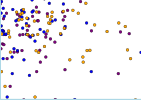

In [84]:
plot.show()

In [65]:
for n in names(df)
    println(n)
end

A
B
M
Y


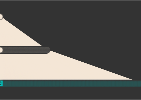

In [86]:
plot.tree()

In [122]:
function Circle(x,y,diameter,fillin=:orange,stroke=:black)
    composition = compose(context(), circle(x,y,diameter), fill(string(fillin)))
    color = string("\"",string(fillin),"\"")
    stroke = string("\"",string(stroke),"\"")
    tag = string("circle(",string(x),",",string(y),',',diameter,"), fill(", color , "),")
    tree() = introspect(composition)
    show() = composition
    x = x
    y = y
    update(x,y) =  string("circle(",string(x),",",string(y),',',diameter,"), fill(", color ,"), stroke(",stroke, "),")
    (var)->(show;composition;tree;tag;x;y;update;diameter)
end
function Line(pairs, color=:black, width=2)
    tree() = introspect(composition)
    show() = composition
    composition = compose(context(), line(pairs), stroke(string(color)))
    color = string("\"",string(color),"\"")
    pairstring = ""
    for i in pairs
        s = string(i) * ","
        pairstring = pairstring * s
    end
    update(pairs) = string("line([",string(join(pairstring)),"]), stroke(", color, "), linewidth(",width,"mm),")
    (var)->(show;composition;tree;update;color;pairs)
end

Line (generic function with 3 methods)

In [123]:
function _arrayscatter(x,y,shape,debug=false)
   topx = maximum(x)
    topy = maximum(y)
    axisx = Line([(-1,-1), (-1,1), (1,1)],:blue)
   axisx_tag = axisx.update([(-1,-1), (-1,1), (1,1)])
    axisy = Line([(0,0), (0,1), (0,1)],:blue)
    axisy_tag = axisy.update([(0,0), (0,1), (0,1)])
    grid = Grid(4)
    grid_tag = grid.update()
    expression = string("compose(context(), (context(),", axisx_tag, axisy_tag, grid_tag, "), (context(),")
    # Coordinate parsing -------
    for (i, w) in zip(x, y)
        inputx = i / topx
        inputy = w / topy
        exp = shape.update(inputx,inputy)
        expression = string(expression,string(exp))
    end
    expression = Meta.parse(string(expression,"))"))
    if debug == true println(expression) end
    composition = eval(expression)
    show() = composition
    tree() = introspect(composition)
    (var)->(show;composition;tree)
end

_arrayscatter (generic function with 2 methods)